<img src="https://raw.githubusercontent.com/Ironhack-Data-Madrid-Marzo-2021/W7-Kaggle_competition/master/images/PORTADA.jpg">

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import src.limpieza as lm

# Download Kaggle

In [2]:
lm.download_kaggle()

Kaggle file downloaded.
Kaggle file unzipped.
zip file deleted.
Files moved to data folder.


"DataFrames downloaded correctly as 'test' and 'train'."

# Read DataSets

In [3]:
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")


In [4]:
train.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
28280,28280,1.02,Good,G,SI2,59.9,58.0,6.48,6.55,3.90,8.333
21827,21827,1.01,Ideal,H,VS1,59.8,59.0,6.52,6.56,3.91,8.622
17539,17539,0.71,Ideal,G,SI1,62.5,57.0,5.72,5.64,3.55,7.703
36911,36911,0.35,Good,E,SI2,63.9,55.0,4.48,4.50,2.87,6.196
15913,15913,0.72,Ideal,H,SI2,60.8,56.0,5.79,5.83,3.53,7.720


In [5]:
test.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.01,Ideal,H,SI1,61.9,57.0,8.14,8.05,5.01
1,1,0.49,Good,D,VS1,57.5,60.0,5.18,5.25,3.00
2,2,1.03,Premium,F,SI1,58.6,62.0,6.65,6.60,3.88
3,3,0.90,Very Good,E,SI1,63.0,56.0,6.11,6.15,3.86
4,4,0.59,Ideal,D,SI1,62.5,55.0,5.35,5.40,3.36


# Exploring Data
Once we have downloaded the information we must explore and analyse it, the first thing we are going to see is its `.shape`, then the types of data contained in the dataframe with the `.dtypes` method. Also we have to check if there is null values with `.isnull()`.

In [6]:
train.shape

(40455, 11)

In [7]:
test.shape

(13485, 10)

In [8]:
test.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

As we can see there are three columns containing `categorical values`, the next step is to see how many values are in each column and see if we could replace them with `numerical values`.

In [9]:
test.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [10]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Categorical to numerical a.k.a. `Getting Dummies`.
As the values that are strings have a priority ranking, we can evaluate them.

## Clarity
Clarity is a measure of a `diamond's purity` and rarity graded by the visibility of these characteristics under 10x magnification. A stone is classified as flawless if, under 10x magnification, it has no inclusions (internal imperfections) and no visible blemishes (external imperfections).

* **FL**(flawless): FL diamonds are flawless
* **IF**(internally flawless): IF diamonds are internally flawless
* **VVS1 - VVS2**(very very slightly included): VVS diamonds (1 and 2) have very very light inclusions. 
* **VS1 - VS2**(very slightly included): VS diamonds (1 and 2) have very light inclusions 
* **SI1 - SI2**(slightly included): SI diamonds (1 and 2) have light inclusions 
* **I1 - I2 - I3**(imperfect): I diamonds (1, 2 and 3) are flawed

In [11]:
train.clarity.value_counts()

SI1     9759
VS2     9199
SI2     6912
VS1     6168
VVS2    3811
VVS1    2714
IF      1329
I1       563
Name: clarity, dtype: int64

In [12]:
claridad = {
    "I1":1,
    "SI1":2,
    "SI2":2.5,
    "VS1":3,
    "VS2":3.5,
    "VVS1":4,
    "VVS2":4.5,
    "IF":5
    }

In [13]:
train.clarity = train.clarity.map(claridad)
test.clarity = test.clarity.map(claridad)

test.sample(3)

,id,carat,cut,color,clarity,depth,table,x,y,z
5011,5011,0.52,Very Good,G,3.5,63.0,56.0,5.09,5.13,3.22
5030,5030,1.23,Very Good,F,4.5,62.2,58.0,6.81,6.86,4.25
11600,11600,1.00,Premium,G,3.0,62.9,60.0,6.36,6.29,3.98


## Color
Colour is one of the `most important characteristics` of a diamond: the whiter (transparent), the more beautiful, scarcer and more valuable. To determine the clarity or transparency of a diamond, there is a colour scale that divides the colour grades from D to Z. This scale was established by the GIA (Gemological Institute of America) and is internationally accepted. 


In [14]:
train.color.value_counts()

G    8462
E    7308
F    7213
H    6201
D    5010
I    4134
J    2127
Name: color, dtype: int64

In [15]:
list(train.color.value_counts().keys())

['G', 'E', 'F', 'H', 'D', 'I', 'J']

In [16]:
clr = {
    "D":7,
    "E":6,
    "F":5,
    "G":4,
    "H":3,
    "I":2,
    "J":1
    }

In [17]:
train.color = train.color.map(clr)
test.color = test.color.map(clr)

test.sample(3)

,id,carat,cut,color,clarity,depth,table,x,y,z
13312,13312,0.43,Ideal,2,3.0,61.8,55.0,4.88,4.90,3.02
8861,8861,0.28,Ideal,6,3.0,62.0,56.0,4.18,4.21,2.60
1892,1892,0.42,Ideal,7,4.5,61.7,57.0,4.82,4.80,2.97


## Cut
The cut is the element that `reveals the brilliance of the diamond`. It is the only criterion among the 4Cs that depends on human expertise. The cut refers to the proportions of the stone.  A diamond sparkles and shines according to its cut.  If its proportions are not right, it will sparkle less because the light inside it will not reflect properly. 


In [18]:
train.cut.value_counts()

Ideal        16217
Premium      10339
Very Good     9014
Good          3668
Fair          1217
Name: cut, dtype: int64

In [19]:
ct = {
    "Fair":1,
    "Good":2,
    "Very Good": 3,
    "Premium":4,
    "Ideal":5    
    }

In [20]:
train.cut = train.cut.map(ct)
test.cut = test.cut.map(ct)

test.sample(3)

,id,carat,cut,color,clarity,depth,table,x,y,z
4162,4162,0.39,5,7,4.5,61.8,57.0,4.71,4.67,2.90
12420,12420,1.00,3,2,2.0,63.3,54.0,6.39,6.34,4.03
1079,1079,1.21,3,3,3.5,62.1,60.0,6.77,6.83,4.22


# Correlation

Once we have changed the categorical values to numerical values, we check the collinearity of the data.

<AxesSubplot:>

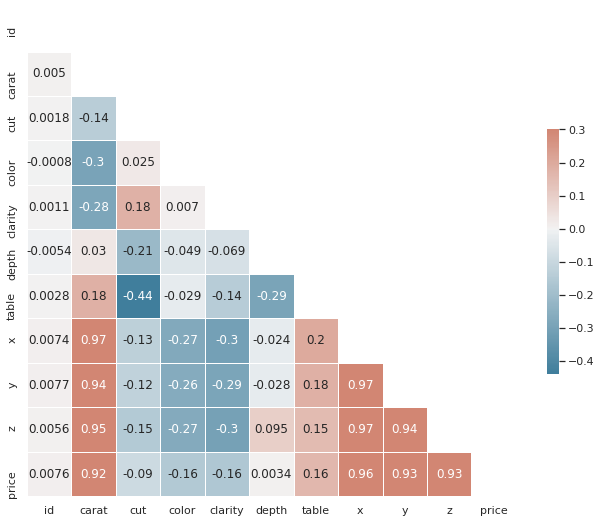

In [21]:
lm.heat_map_triangle(train)

`Carat` is the unit of measurement for the physical weight of diamonds. One carat equals 0.200 grams or 1/5 gram and is subdivided into 100 points.
    Therefore this value is related to the dimensions of the diamond, that is why the correlation is so high, because of this our algorithm could give problems. Let's try to remove these columns and stay only with carat.

In [22]:
train.drop(["x","y","z"], axis=1, inplace=True)
test.drop(["x","y","z"], axis=1, inplace=True)
train.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,1.01,4,4,3.0,62.7,58.0,8.754
1,1,0.60,2,4,3.5,64.3,57.0,7.492
2,2,1.60,4,3,2.5,59.4,59.0,9.010
3,3,0.30,3,1,3.0,63.5,58.0,6.227
4,4,1.00,3,5,2.5,62.8,57.0,8.314


<AxesSubplot:>

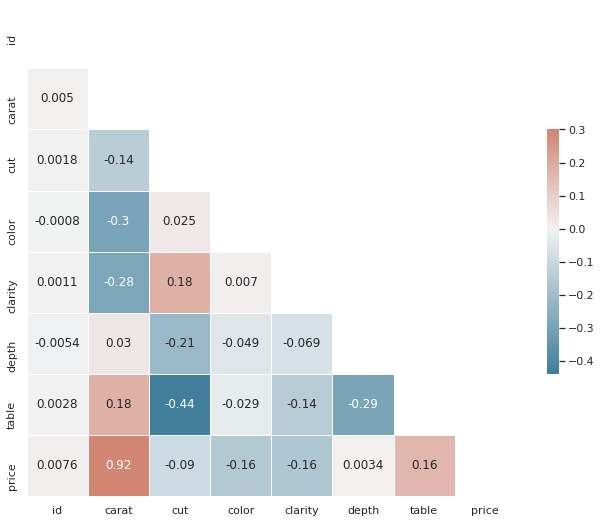

In [23]:
lm.heat_map_triangle(train)

#### As we can see our model is now more efficient because there are no values with high collinearity.

# Now we have to export `clear DataFrames`

In [24]:
train.to_csv("data/train_limpio.csv")
test.to_csv("data/test_limpio.csv")
